In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import statistics
import matplotlib.pyplot as plt


In [2]:
Qi = list(pd.read_csv('Spring Results\Embed_results1000.csv').Q_Index.values) 
Ri = list(pd.read_csv('Spring Results\Embed_results1000.csv').R_Index.values) 
Embed_Base = list(pd.read_csv('Spring Results\Embed_results1000.csv').Embed_Base.values) 
Embed_Means = list(pd.read_csv('Spring Results\Embed_results1000.csv').Embed_Means.values) 
Embed_Sd = list(pd.read_csv('Spring Results\Embed_results1000.csv').Embed_Sd.values) 
VGG16_Base = list(pd.read_csv('Spring Results\VGG16_results1000.csv').VGG16_Base.values) 
VGG16_Means = list(pd.read_csv('Spring Results\VGG16_results1000.csv').VGG16_Means.values) 
VGG16_Sd = list(pd.read_csv('Spring Results\VGG16_results1000.csv').VGG16_Sd.values) 

In [4]:
df = pd.DataFrame({
    'Q_Index': Qi,
    'R_Index': Ri,
    'Embed_Base': np.round(Embed_Base, 4),
    'Embed_Means': np.round(Embed_Means, 4),
    'Embed_Sd': np.round(Embed_Sd, 4),
    'VGG16_Base': np.round(VGG16_Base, 4),
    'VGG16_Means': np.round(VGG16_Means, 4),
    'VGG16_Sd': np.round(VGG16_Sd, 4)
})
df.to_csv('Combined_results1000.csv', index=False)


# standardize and cdf

In [3]:
Embed_standard = (np.array(Embed_Base)-np.array(Embed_Means))/np.array(Embed_Sd)
Embed_cdf = norm.cdf(Embed_standard, 0, 1)
print(statistics.mean(Embed_cdf))

0.8644989028386649


In [4]:
VGG16_standard = (np.array(VGG16_Base)-np.array(VGG16_Means))/np.array(VGG16_Sd)
VGG16_cdf = norm.cdf(VGG16_standard, 0, 1)
print(statistics.mean(VGG16_cdf))

0.8473465314641667


In [5]:
print(Embed_standard[0:5])
print(Embed_cdf[0:5])
print(VGG16_standard[0:5])
print(VGG16_cdf[0:5])

[ 3.1957802   1.7581729  -1.08794418  3.67804083  2.34543872]
[0.99930273 0.96064095 0.13830988 0.99988248 0.99049765]
[ 3.79046798 -0.02093192 -2.04926178  4.95094036  2.47223728]
[0.99992482 0.49164998 0.02021826 0.99999963 0.99328648]


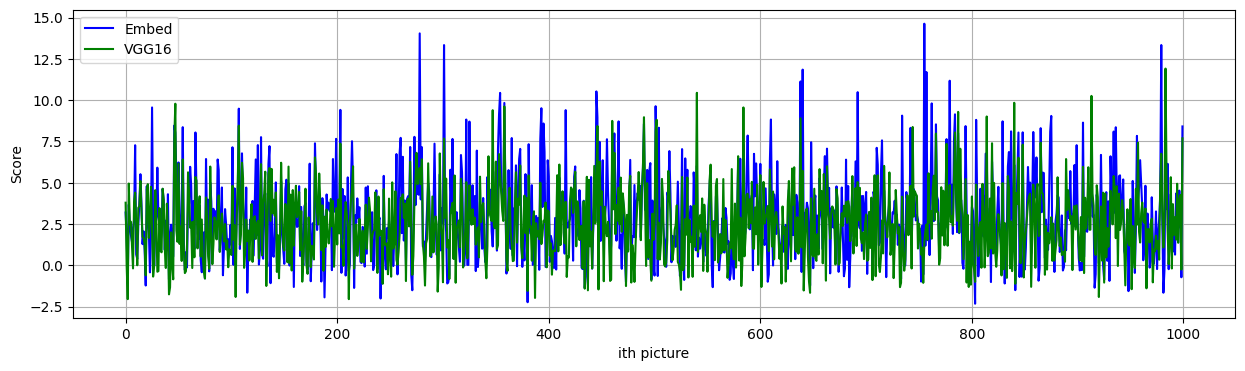

In [10]:
# Example data for two lines

# Generating corresponding x coordinates based on the positions in the array
x_coords = list(range(1000))  # Assuming both lines have the same length

# Plotting the lines
plt.figure(figsize=(15, 4))
plt.plot(x_coords, Embed_standard, label='Embed', color='blue')  # Line 1 in blue
plt.plot(x_coords, VGG16_standard, label='VGG16', color='green')  # Line 2 in green
plt.xlabel('ith picture')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.savefig('vs_standard_score.pdf', dpi=1000, format='pdf')  # Saving as a PDF with high DPI
plt.show()


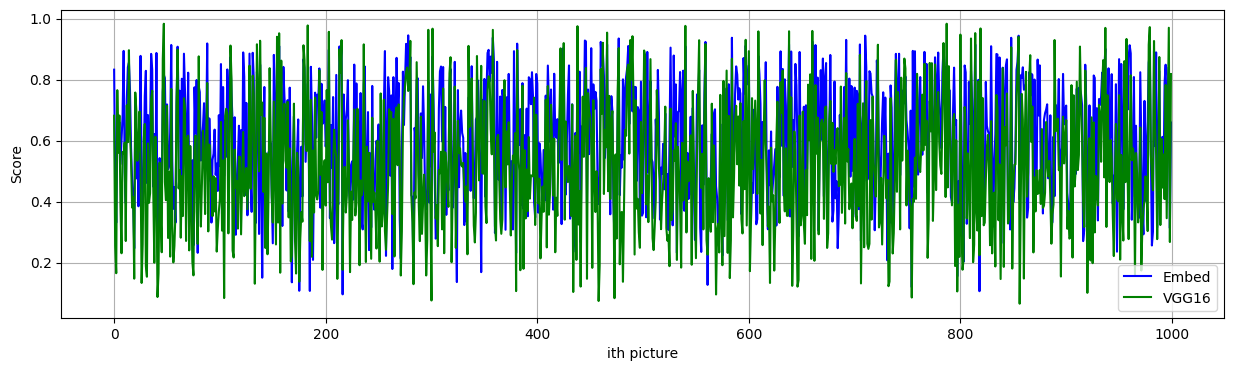

In [11]:
# Example data for two lines

# Generating corresponding x coordinates based on the positions in the array
x_coords = list(range(1000))  # Assuming both lines have the same length

# Plotting the lines
plt.figure(figsize=(15, 4))
plt.plot(x_coords, Embed_Base, label='Embed', color='blue')  # Line 1 in blue
plt.plot(x_coords, VGG16_Base, label='VGG16', color='green')  # Line 2 in green
plt.xlabel('ith picture')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.savefig('vs_base_score.pdf', dpi=1000, format='pdf')  # Saving as a PDF with high DPI
plt.show()

# Confidence interval

In [12]:
z_alpha = norm.ppf(0.95)
c_range = z_alpha*statistics.stdev(Embed_cdf)/(1000**0.5) # 100^0.5
print(statistics.mean(Embed_cdf)-c_range, statistics.mean(Embed_cdf)+c_range)


0.8519615518395773 0.8770362538377525


In [15]:
z_alpha = norm.ppf(0.99)
range = z_alpha*statistics.stdev(Embed_cdf)/(1000**0.5) # 100^0.5
print(statistics.mean(Embed_cdf)-c_range, statistics.mean(Embed_cdf)+c_range)


0.8336091371964289 0.8953886684809009


In [16]:
z_alpha = norm.ppf(0.90)
c_range = z_alpha*statistics.stdev(Embed_cdf)/(1000**0.5) # 100^0.5
print(statistics.mean(Embed_cdf)-c_range, statistics.mean(Embed_cdf)+c_range)

0.8547307012568369 0.8742671044204929
